In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from google.colab import files


Using TensorFlow backend.


In [ ]:
import pickle
pik=open("/content/drive/My Drive/data/x_train.pickle","rb")
x_train=pickle.load(pik)
pikk=open("/content/drive/My Drive/data/y_train.pickle","rb")
y_train=pickle.load(pikk)

1


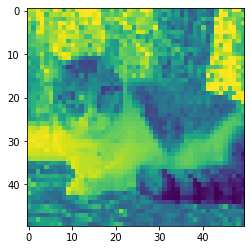

In [ ]:
plt.imshow(x_train[1])
print(y_train[1])

In [ ]:
x_train=np.array(x_train).reshape(-1,50,50,1)
#y_train=np.array(y_train)
x_train=x_train/255
#y_train=y_train/255

In [ ]:
import keras
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten,Conv2D,MaxPooling2D,Dropout

In [ ]:
from keras.callbacks import TensorBoard
import datetime

In [ ]:
 logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
 tensorboard = TensorBoard(logdir, histogram_freq=1)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam" ,metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=3, validation_split=0.3,callbacks=[tensorboard])

Train on 17462 samples, validate on 7484 samples
Epoch 1/3
17462/17462 [==============================] - 90s 5ms/step - loss: 0.6476 - accuracy: 0.6109 - val_loss: 0.5928 - val_accuracy: 0.6887
Epoch 2/3
17462/17462 [==============================] - 89s 5ms/step - loss: 0.5362 - accuracy: 0.7299 - val_loss: 0.5208 - val_accuracy: 0.7410
Epoch 3/3
17462/17462 [==============================] - 89s 5ms/step - loss: 0.4813 - accuracy: 0.7681 - val_loss: 0.5081 - val_accuracy: 0.7485


In [ ]:
def predic(file):
  img=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
  img_arry=cv2.resize(img,(50,50))
  return img_arry.reshape(-1,50,50,1)

prec=model.predict([predic("/content/drive/My Drive/data/dog5.jpg")])

In [ ]:
cato=["dog","cat"]
print(cato[int(prec)])

dog


UsageError: Line magic function `%tensorboard` not found.
